<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/DecisionTree/Air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kagglehub

In [ ]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "sazidthe1"
dataset_name = "global-air-pollution-data"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "SouthAfricaCrimeStats_v2.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "global_air_pollution_data.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 371k/371k [00:00<00:00, 66.6MB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/sazidthe1/global-air-pollution-data/versions/3
Contents of the dataset:
3/
    global_air_pollution_data.csv


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'pm2.5_aqi_value')

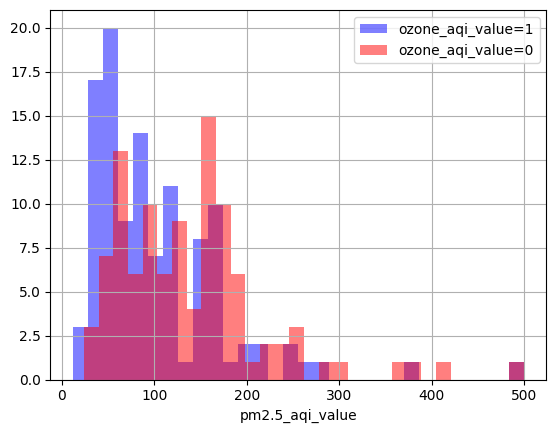

In [ ]:
df[df['ozone_aqi_value']==1]['pm2.5_aqi_value'].hist(alpha=0.5,color='blue',  bins=30,label='ozone_aqi_value=1')
df[df['ozone_aqi_value']==0]['pm2.5_aqi_value'].hist(alpha=0.5,color='red', bins=30,label='ozone_aqi_value=0')
plt.legend()
plt.xlabel('pm2.5_aqi_value')

Text(0.5, 0, 'no2_aqi_value')

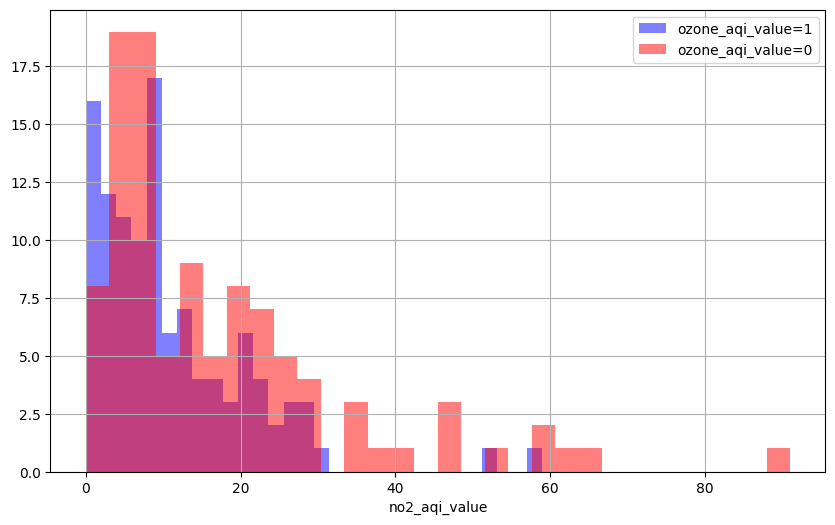

In [ ]:
plt.figure(figsize=(10,6))
df[df['ozone_aqi_value']==1]['no2_aqi_value'].hist(alpha=0.5,color='blue', bins=30,label='ozone_aqi_value=1')
df[df['ozone_aqi_value']==0]['no2_aqi_value'].hist(alpha=0.5,color='red', bins=30,label='ozone_aqi_value=0')
plt.legend()
plt.xlabel('no2_aqi_value')

<Axes: xlabel='aqi_category', ylabel='count'>

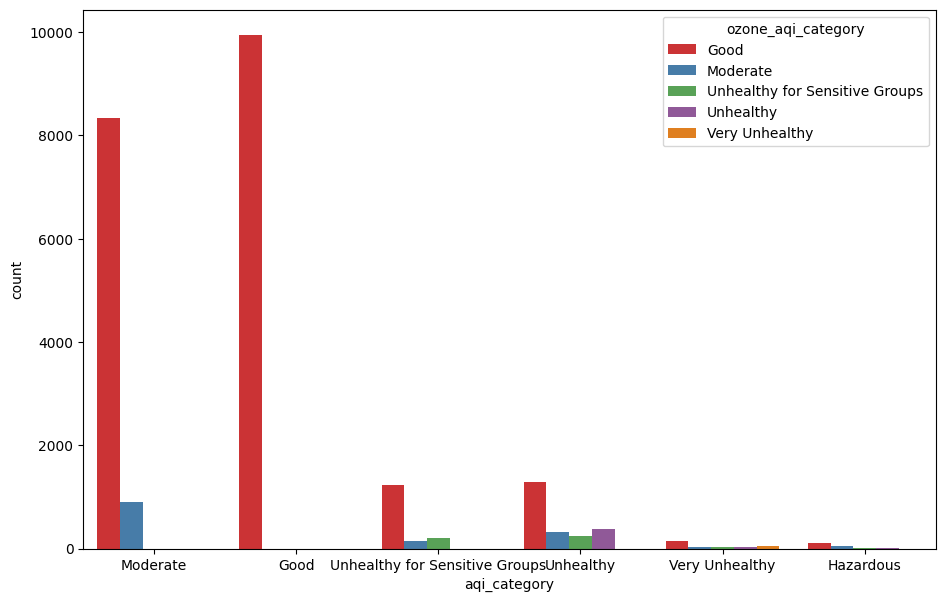

In [ ]:

plt.figure(figsize=(11,7))
sns.countplot(x='aqi_category',hue='ozone_aqi_category',data=df,palette='Set1')

In [ ]:
cat_feats = ['aqi_category']

In [ ]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   country_name                                 23036 non-null  object
 1   city_name                                    23462 non-null  object
 2   aqi_value                                    23463 non-null  int64 
 3   co_aqi_value	                                23463 non-null  int64 
 4   co_aqi_category                              23463 non-null  object
 5   ozone_aqi_value                              23463 non-null  int64 
 6   ozone_aqi_category                           23463 non-null  object
 7   no2_aqi_value                                23463 non-null  int64 
 8   no2_aqi_category                             23463 non-null  object
 9   pm2.5_aqi_value                              23463 non-null  int64 
 10  pm2.5_aqi_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop(['pm2.5_aqi_category', 'country_name', 'city_name', 'co_aqi_category', 'ozone_aqi_category', 'no2_aqi_category'],axis=1)
y = final_data['pm2.5_aqi_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      3154
                     Hazardous       1.00      1.00      1.00        47
                      Moderate       1.00      1.00      1.00      2639
                     Unhealthy       1.00      1.00      1.00       645
Unhealthy for Sensitive Groups       1.00      1.00      1.00       486
                Very Unhealthy       1.00      1.00      1.00        68

                      accuracy                           1.00      7039
                     macro avg       1.00      1.00      1.00      7039
                  weighted avg       1.00      1.00      1.00      7039



In [ ]:
print(confusion_matrix(y_test,predictions))

[[3154    0    0    0    0    0]
 [   0   47    0    0    0    0]
 [   0    0 2639    0    0    0]
 [   0    0    0  645    0    0]
 [   0    0    0    0  486    0]
 [   0    0    0    0    0   68]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      3154
                     Hazardous       1.00      1.00      1.00        47
                      Moderate       1.00      1.00      1.00      2639
                     Unhealthy       1.00      1.00      1.00       645
Unhealthy for Sensitive Groups       1.00      1.00      1.00       486
                Very Unhealthy       1.00      1.00      1.00        68

                      accuracy                           1.00      7039
                     macro avg       1.00      1.00      1.00      7039
                  weighted avg       1.00      1.00      1.00      7039



In [ ]:
print(confusion_matrix(y_test,predictions))

[[3154    0    0    0    0    0]
 [   0   47    0    0    0    0]
 [   0    0 2639    0    0    0]
 [   0    0    0  645    0    0]
 [   0    0    0    0  486    0]
 [   0    0    0    0    0   68]]
